# Fitbit Exploration
For an explanation on the variables, take a look at the [data dictionary created by Fitabase](https://www.fitabase.com/media/1546/fitabasedatadictionary.pdf).

## Summary Notebook
In this notebook we take a look at the available data focusing on sleep parameters primarily.

In [1]:
import os
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Daily Data
We start by looking at the largest averaging window: daily recorded events.

In [2]:
daily_fitbit = pd.read_csv("../data/processed/bpeace2-fitbit-daily.csv",index_col=0,parse_dates=True)
daily_fitbit.head()

,activities_calories,activities_caloriesBMR,activities_steps,activities_distance,activities_minutesSedentary,activities_minutesLightlyActive,activities_minutesFairlyActive,activities_minutesVeryActive,activities_activityCalories,body_bmi,body_fat,body_weight,foods_log_caloriesIn,foods_log_water,beiwe
date,,,,,,,,,,,,,,,
2020-05-01,1949.0,1255.0,8704,3.472440,520,258,22,0,886.0,22.082436,0.0,119.99,0.0,0.0,15tejjtw
2020-05-02,1821.0,1255.0,7532,3.032745,540,249,0,0,740.0,22.082436,0.0,119.99,0.0,0.0,15tejjtw
2020-05-03,2455.0,1255.0,20823,8.556225,686,290,22,81,1503.0,22.082436,0.0,119.99,0.0,0.0,15tejjtw
2020-05-04,1327.0,1255.0,522,0.210179,792,40,0,0,92.0,22.082436,0.0,119.99,0.0,0.0,15tejjtw
2020-05-05,1964.0,1255.0,11851,5.009892,411,124,27,65,862.0,22.082436,0.0,119.99,0.0,0.0,15tejjtw


Adding a column for total active minutes which should give us a picture of whether or not their device was on the entire day.

In [3]:
daily_fitbit["activities_minutes"] = daily_fitbit[["activities_minutesSedentary","activities_minutesLightlyActive",
                                                "activities_minutesFairlyActive","activities_minutesVeryActive"]].sum(axis=1)
# checking to see if it makes sense - should be 1440
print(np.max(daily_fitbit["activities_minutes"]))
# finding cutoffs for other variables
print(np.max(daily_fitbit["activities_steps"]))
print(np.max(daily_fitbit["activities_calories"]))

1440
32892
3728.0


## Data Availability
Looking at heatmaps per participant to see logged data

Working for activities_calories
	Data collected
	Plotting


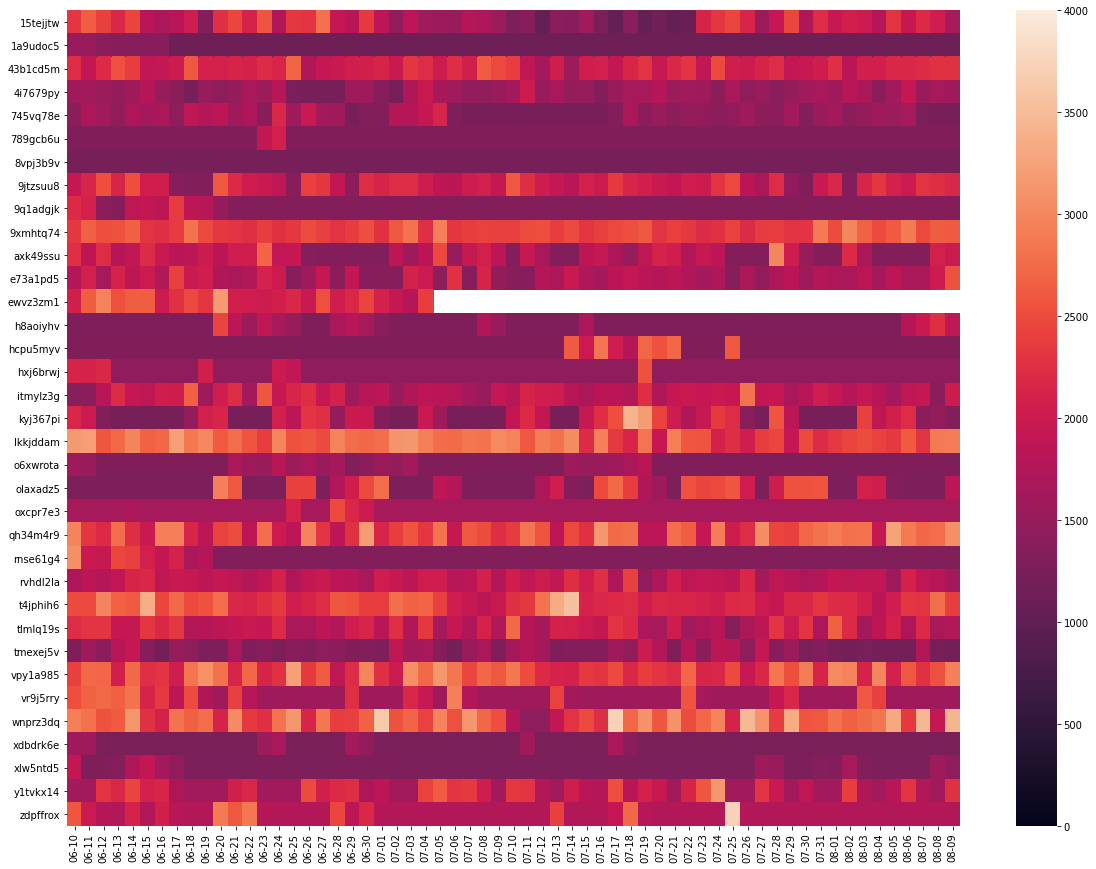

Working for activities_steps
	Data collected
	Plotting


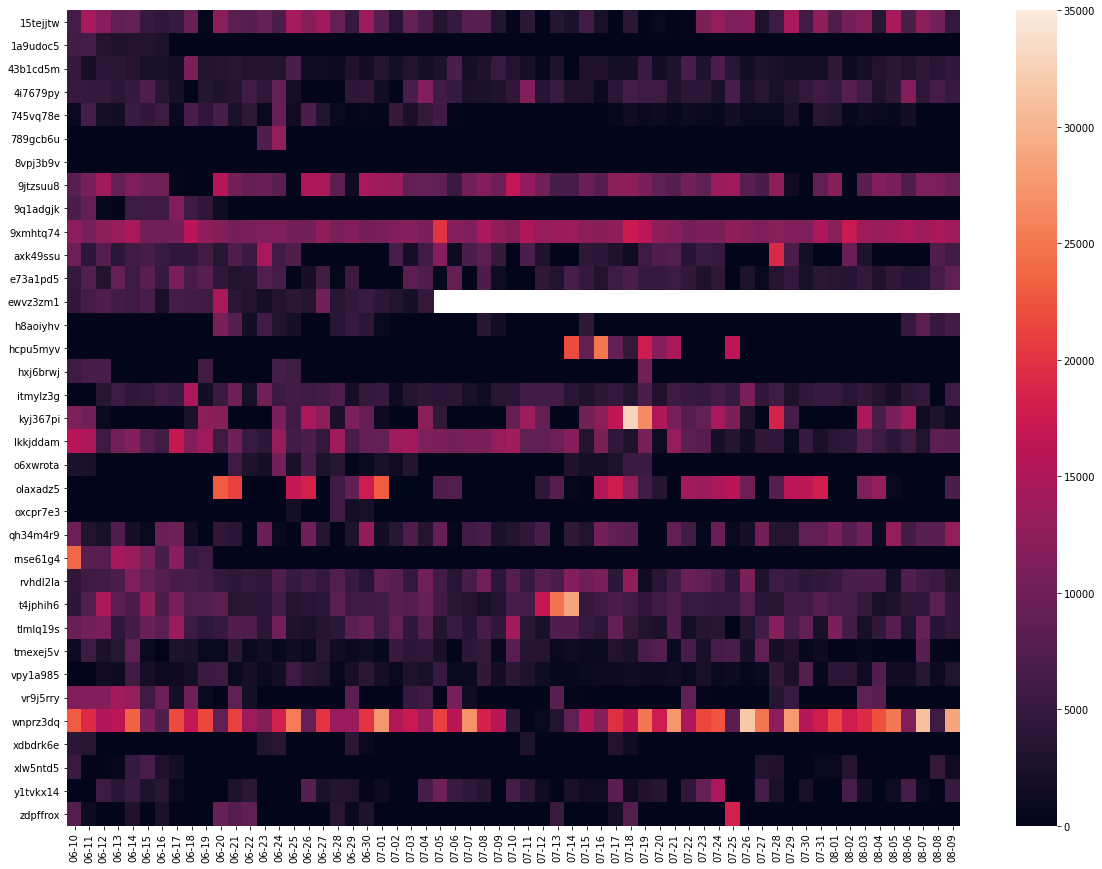

Working for activities_minutes
	Data collected
	Plotting


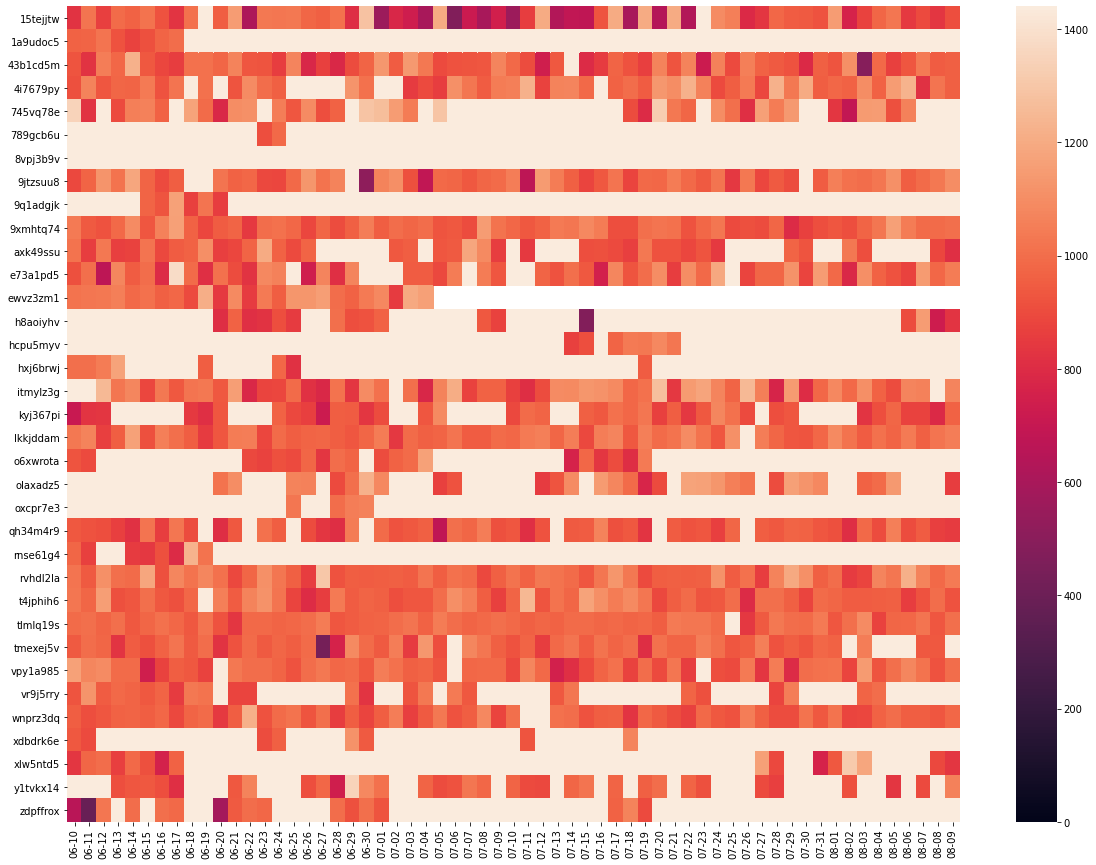

In [4]:
var_list = ['activities_calories','activities_steps','activities_minutes',]
limit_list = [[0,4000],[0,35000],[0,1440]]
for variable, limits in zip(var_list, limit_list):
    print(f'Working for {variable}')
    heatmap_df = pd.DataFrame()
    for beiwe in daily_fitbit['beiwe'].unique():
        daily_fitbit_by_beacon = daily_fitbit[daily_fitbit['beiwe'] == beiwe]
        sdate = datetime(2020,6,10)
        edate = datetime(2020,9,2)
        daily_fitbit_by_beacon = daily_fitbit_by_beacon[sdate:edate]
        heatmap_df = pd.concat([heatmap_df,daily_fitbit_by_beacon[variable]],axis=1)
        heatmap_df.rename(columns={variable:beiwe}, inplace=True)

    print(f'\tData collected')
    fig, ax = plt.subplots(figsize=(20,15))
    df_to_plot = heatmap_df.T
    print(f'\tPlotting')
    sns.heatmap(df_to_plot,vmin=limits[0],vmax=limits[1])
        
    x_labels = []
    for d in pd.date_range(sdate,edate-timedelta(days=1),freq='d'):
        x_labels.append(d.strftime('%m-%d'))
        
    ax.set_xticklabels(x_labels)
    
    plt.show()
    plt.close()

<div class="alert alert-block alert-warning">

The last figure gives the best insight into the available data from each participant. Cells with the lightest color correspond to 1440 minutes (1 day) meaning the Fitbit recorded data all day. 
    
</div>

## Sleep Data
Sleep data is a subset of the daily data and we can check to see how many nights of data we have available at least from the current dataset.


In [25]:
daily_sleep = pd.read_csv("../data/processed/bpeace2-fitbit-sleep-daily.csv",index_col=0,parse_dates=True)
# converting duration to something that makes more sense...
daily_sleep['durationHours'] = daily_sleep['duration'] / 3600000
daily_sleep.head()

,awakeCount,awakeDuration,awakeningsCount,dateOfSleep,duration,efficiency,endTime,logId,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,restlessDuration,startTime,timeInBed,beiwe,durationHours
date,,,,,,,,,,,,,,,,,,
2020-05-01,1,3,30,2020-05-01,38400000,92,2020-05-01T12:12:30.000,26980914882,0,590,50,0,29,47,2020-05-01T01:32:30.000,640,15tejjtw,10.666667
2020-05-02,3,9,41,2020-05-02,39060000,91,2020-05-02T13:13:00.000,26996086598,0,590,61,0,38,52,2020-05-02T02:21:30.000,651,15tejjtw,10.850000
2020-05-03,2,2,21,2020-05-03,21660000,88,2020-05-03T08:01:00.000,27009771663,1,315,45,0,19,44,2020-05-03T01:59:30.000,361,15tejjtw,6.016667
2020-05-04,1,2,25,2020-05-04,36480000,89,2020-05-04T14:13:30.000,27022238683,0,541,65,0,24,35,2020-05-04T04:05:00.000,608,15tejjtw,10.133333
2020-05-05,1,1,6,2020-05-05,5760000,89,2020-05-05T17:33:30.000,27039089529,1,85,10,0,5,10,2020-05-05T15:57:00.000,96,15tejjtw,1.600000


The [data dictionary](https://www.fitabase.com/media/1546/fitabasedatadictionary.pdf) for these variables can be quite enlightening as many of these variables are useless.

### Scatter of Number of Nights
Here we look at how many nights of data each participant recorded

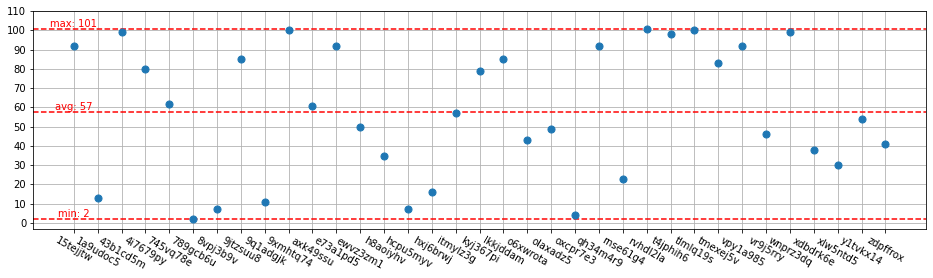

In [23]:
# Number of surveys submitted
bid = []
sleep_recorded = []
# Looping through beacon participants only
for beiwe in daily_sleep['beiwe'].unique():
    sleep_by_beiwe = daily_sleep[daily_sleep['beiwe'] == beiwe]
    bid.append(beiwe)
    sleep_recorded.append(len(sleep_by_beiwe))

fig, ax = plt.subplots(figsize=(16,4))
# scattering number of surveys submitted per participant
ax.scatter(bid,sleep_recorded,s=50,zorder=10)
ax.set_yticks(np.arange(0,120,10))
plt.xticks(rotation=-30)
ax.grid(zorder=1)
# adding average line
ax.axhline(np.nanmean(sleep_recorded),color='red',linestyle='dashed')
avg = int(np.nanmean(sleep_recorded))
ax.text(bid[0],np.nanmean(sleep_recorded),f'avg: {avg}',va='bottom',ha='center',color='red')
# adding max line
ax.axhline(np.nanmax(sleep_recorded),color='red',linestyle='dashed')
ax.text(bid[0],np.nanmax(sleep_recorded),f'max: {np.nanmax(sleep_recorded)}',va='bottom',ha='center',color='red')
# adding min line
ax.axhline(np.nanmin(sleep_recorded),color='red',linestyle='dashed')
ax.text(bid[0],np.nanmin(sleep_recorded),f'min: {np.nanmin(sleep_recorded)}',va='bottom',ha='center',color='red')
#percentage
plt.show()
plt.close()

### Histograms
Now we take a look at the typical values recorded for various components of sleep.

#### Typical Sleep Quantification Values
Here we look at TST and Efficiency distributions.

Working for durationHours
	Plotting


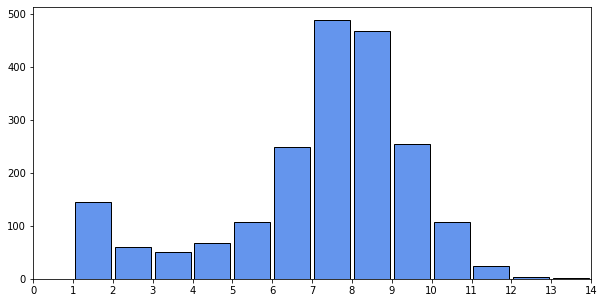

Working for efficiency
	Plotting


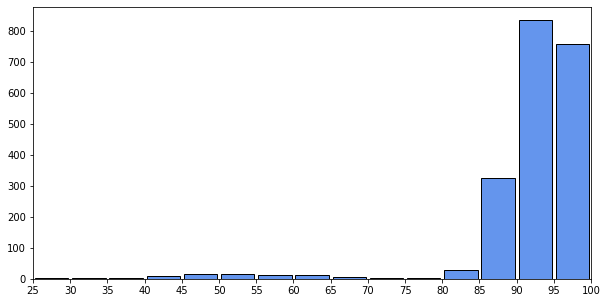

In [44]:
var_list = ['durationHours','efficiency']
bins=[np.arange(0,15,1),
     np.arange(25,105,5)]
for variable,bin_amt in zip(var_list,bins):
    print(f'Working for {variable}')
    fig, ax = plt.subplots(figsize=(10,5))
    print(f'\tPlotting')
        
    ax.hist(daily_sleep[variable],color="cornflowerblue",edgecolor="black",rwidth=0.9,bins=bin_amt)
    ax.set_xticks(bin_amt)
    ax.set_xlim([bin_amt[0],bin_amt[-1]])
    
    plt.show()
    plt.close()

#### Minute Recordings
These histograms summarize some of the (what look like) important data that are on similar minute-scales.

Working for minutes summary
	Plotting
Working for minutes summary
	Plotting
Working for minutes summary
	Plotting


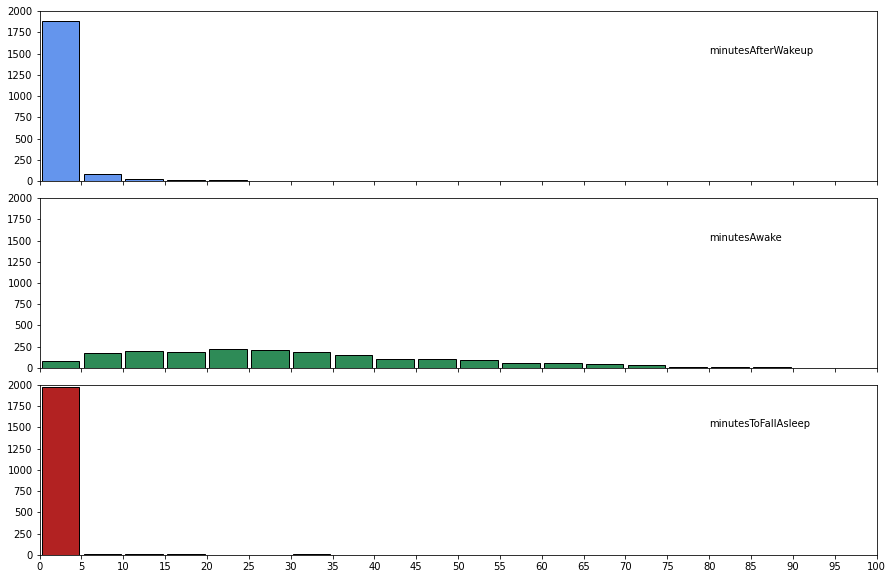

In [59]:
var_list = ['minutesAfterWakeup','minutesAwake','minutesToFallAsleep']
colors= ["cornflowerblue","seagreen","firebrick"]
fig, axes = plt.subplots(3,1,figsize=(15,10),sharex=True)
bins = np.arange(0,105,5)
for i in range(len(var_list)):
    print(f'Working for minutes summary')
    print(f'\tPlotting')
        
    axes[i].hist(daily_sleep[var_list[i]],color=colors[i],edgecolor="black",rwidth=0.9,bins=bins)
    axes[i].set_xticks(bins)
    axes[i].set_xlim([bins[0],bins[-1]])
    axes[i].set_ylim([0,2000])
    
    axes[i].text(80,1500,var_list[i])
    
plt.subplots_adjust(hspace=0.1)
plt.show()
plt.close()

<div class="alert alert-block alert-warning">
    
The takeaways from these figures are:
1. **minutesAfterWakeup**: Useless these are the minutes after waking up that the user remembered to turn _sleep mode_ off - who even uses sleep mode?
2. **minutesAwake**: Pretty self-explanatory and values make sense.
3. **minutesToFallAsleep**: This variable is only populated with useful values if the user uses _sleep mode_ , otherwise the values are zero.

If we remove the zero values from 1 and 3, we get more useful information:
</div>

Working for minutes summary
	Plotting
Working for minutes summary
	Plotting
Working for minutes summary
	Plotting


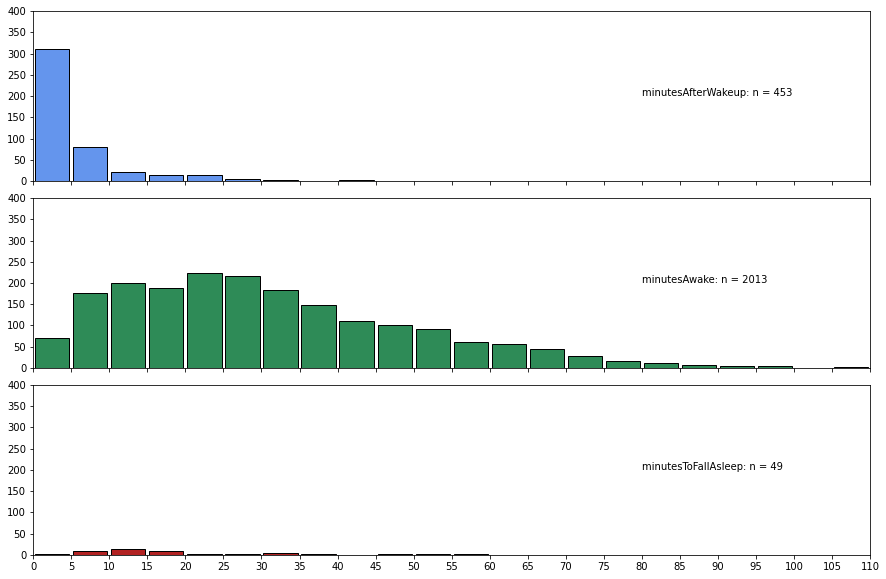

In [65]:
var_list = ['minutesAfterWakeup','minutesAwake','minutesToFallAsleep']
colors= ["cornflowerblue","seagreen","firebrick"]
fig, axes = plt.subplots(3,1,figsize=(15,10),sharex=True)
bins = np.arange(0,115,5)
for i in range(len(var_list)):
    print(f'Working for minutes summary')
    print(f'\tPlotting')
        
    values_to_plot = daily_sleep[daily_sleep[var_list[i]] > 0]
    axes[i].hist(values_to_plot[var_list[i]],color=colors[i],edgecolor="black",rwidth=0.9,bins=bins)
    axes[i].set_xticks(bins)
    axes[i].set_xlim([bins[0],bins[-1]])
    axes[i].set_ylim([0,400])
    
    axes[i].text(80,200,f'{var_list[i]}: n = {len(values_to_plot)}')
    
plt.subplots_adjust(hspace=0.1)
plt.show()
plt.close()

For an accurate calculation of SOL, we should use the minute data and sum the initial "awake" time values - similar to what was done in the UT2000 study.

#### Sleep Count Variables

<div class="alert alert-block alert-warning">
    
Now we look at the variables that are counted during the evening by Fitbit's algorithms. There are three such variables which are not accurately explained via the Fitabase data dictionary nor the <a href=https://dev.fitbit.com/build/reference/web-api/sleep/>Fitbit API</a>. My best guesses are below:

1. **awakeCount**: The number of instances when a person was considered fully awake; the data dictionary simply says that Fitbit uses some clustering algorithm of awakenings which are: 
2. **awakeningsCount**: From what I can gather these are the number of times Fitbit recorded someone as awake. _Fully_ awake which I state above are for instances when the Fitbit counts awakenings for greater than 3 minutes. Hence why the awakeningsCount is larger than the awakeCount since awakeCount can be thought of as recordings of awakeningsCounts that are at least 3 minutes or longer in a row.
3. **restlessCount**: Again, another clustering algorithm that determines restlessness - not sure where they are getting restlessness (might be a combination of heartrate, movement, and sleep stage). 

</div>

Working for minutes summary
	Plotting
Working for minutes summary
	Plotting
Working for minutes summary
	Plotting


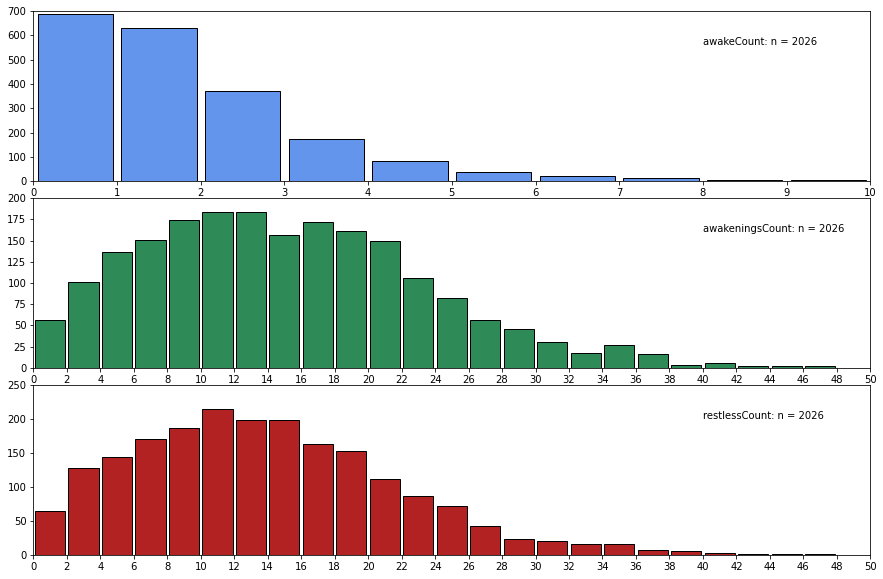

In [90]:
var_list = ['awakeCount','awakeningsCount','restlessCount']
colors= ["cornflowerblue","seagreen","firebrick"]
fig, axes = plt.subplots(3,1,figsize=(15,10))
bins = [np.arange(0,11,1), np.arange(0,52,2), np.arange(0,52,2)]
ylims = [[0,700],[0,200],[0,250]]
for i in range(len(var_list)):
    print(f'Working for minutes summary')
    print(f'\tPlotting')
        
    axes[i].hist(daily_sleep[var_list[i]],color=colors[i],edgecolor="black",rwidth=0.9,bins=bins[i])
    axes[i].set_xticks(bins[i])
    axes[i].set_xlim([bins[i][0],bins[i][-1]])
    axes[i].set_ylim(ylims[i])
    
    axes[i].text(0.8*(bins[i][-1]-bins[i][0]),0.8*(ylims[i][1]-ylims[i][0]),f'{var_list[i]}: n = {len(daily_sleep[var_list[i]])}',ha='left')
    
plt.subplots_adjust(hspace=0.1)
plt.show()
plt.close()

<div class="alert alert-block alert-info">
These variables provide us with some potential links to explore:
    <ul>
        <li>TST and IAQ</li>
        <li>Efficiency and IAQ</li>
        <li>Minutes Awake and IAQ</li>
        <li>Awake Count and IAQ</li>
        <li>Awakenings Count and IAQ</li>
        <li>Restless Count and IAQ (might be similar to previous point)</li>  
    </ul>
</div>

### Heatmaps
Heatmaps will show gaps and give us a decent idea of the values measured.

In [37]:
# Getting extreme values
print(np.min(daily_sleep['durationHours']))
print(np.max(daily_sleep['durationHours']))
print(np.min(daily_sleep['efficiency']))
print(np.max(daily_sleep['efficiency']))

1.0
14.65
27
100


Working for durationHours
	Data collected
	Plotting


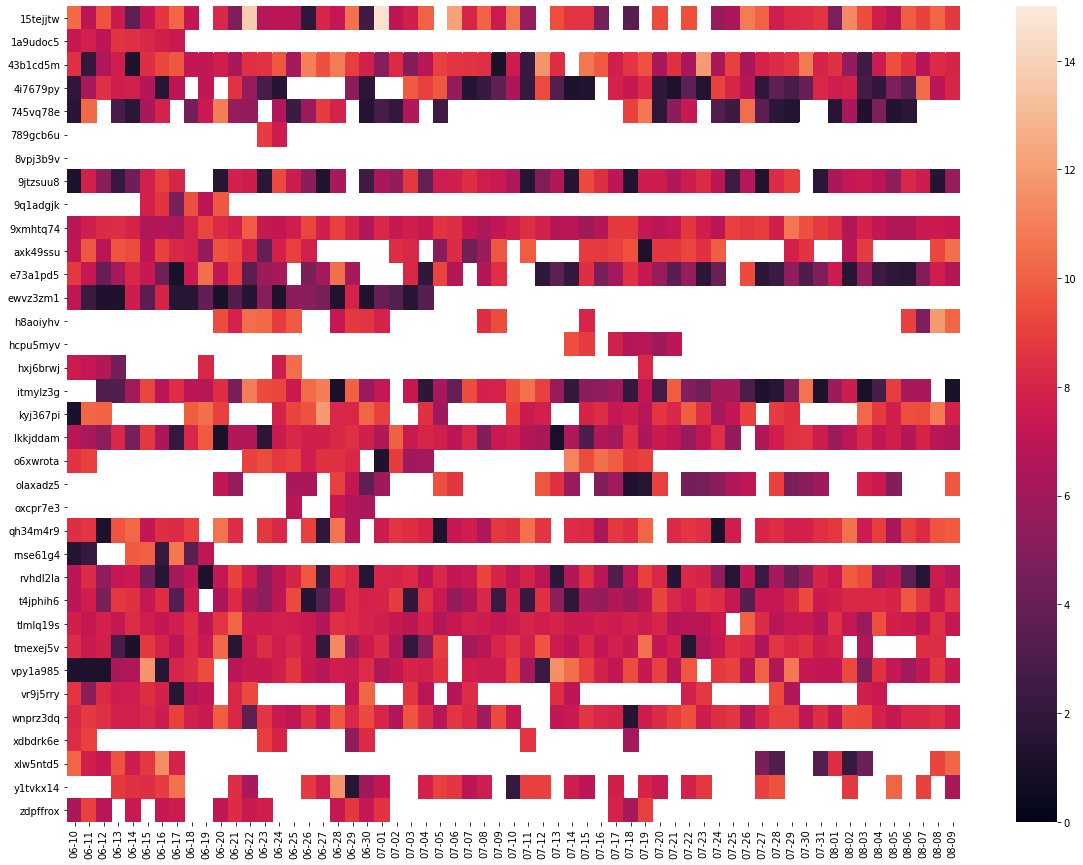

Working for efficiency
	Data collected
	Plotting


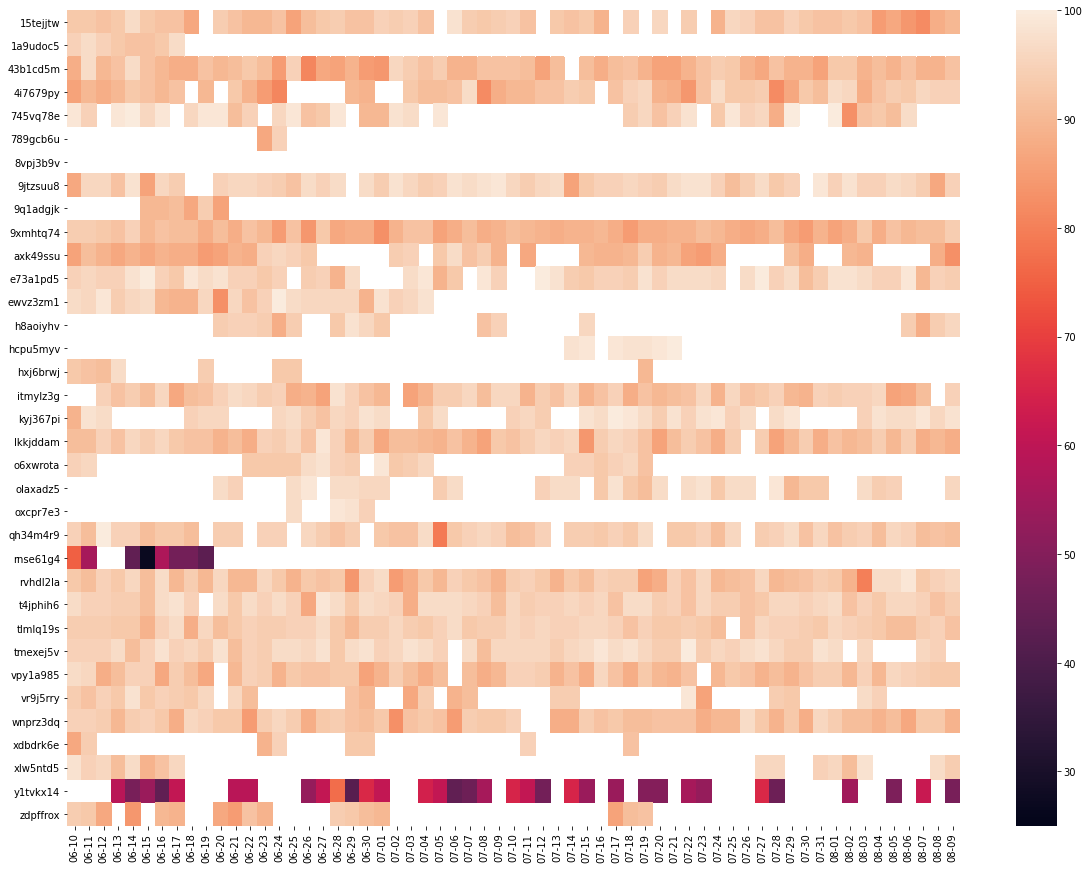

In [38]:
var_list = ['durationHours','efficiency',]
limit_list = [[0,15],[25,100]]
for variable, limits in zip(var_list, limit_list):
    print(f'Working for {variable}')
    heatmap_df = pd.DataFrame()
    for beiwe in daily_sleep['beiwe'].unique():
        daily_fitbit_by_beacon = daily_sleep[daily_sleep['beiwe'] == beiwe]
        sdate = datetime(2020,6,10)
        edate = datetime(2020,9,2)
        daily_fitbit_by_beacon = daily_fitbit_by_beacon[sdate:edate]
        heatmap_df = pd.concat([heatmap_df,daily_fitbit_by_beacon[variable]],axis=1)
        heatmap_df.rename(columns={variable:beiwe}, inplace=True)

    print(f'\tData collected')
    fig, ax = plt.subplots(figsize=(20,15))
    df_to_plot = heatmap_df.T
    print(f'\tPlotting')
    sns.heatmap(df_to_plot,vmin=limits[0],vmax=limits[1])
        
    x_labels = []
    for d in pd.date_range(sdate,edate-timedelta(days=1),freq='d'):
        x_labels.append(d.strftime('%m-%d'))
        
    ax.set_xticklabels(x_labels)
    
    plt.show()
    plt.close()

## Sleep Minute Data
In addition to nightly summaries, we also have the minute data corresponding to the sleep stages recorded by Fitbit.

In [123]:
minute_sleep = pd.read_csv("../data/processed/bpeace2-fitbit-sleep-minute.csv",index_col=0,parse_dates=[1,2,3])
minute_sleep.head()

,start_date,end_date,time,value,beiwe
0,2020-05-01,2020-05-01,2020-10-02 01:32:30,1,15tejjtw
1,2020-05-01,2020-05-01,2020-10-02 01:33:30,1,15tejjtw
2,2020-05-01,2020-05-01,2020-10-02 01:34:30,1,15tejjtw
3,2020-05-01,2020-05-01,2020-10-02 01:35:30,1,15tejjtw
4,2020-05-01,2020-05-01,2020-10-02 01:36:30,1,15tejjtw


<div class="alert alert-block alert-warning">

The "value" column is encoded where 1=asleep, 2=restlass, 3=awake. These are **not** the sleep stages.
    
</div>

### Histogram of Values
We can look at the values to see the relative abundance of each type of sleep parameter.

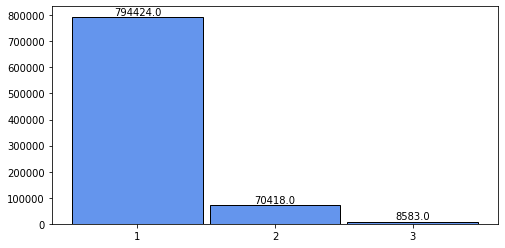

In [117]:
fig, ax = plt.subplots(figsize=(8,4))
n,bins,_ = ax.hist(minute_sleep['value'],bins=[1,2,3,4],align="left",rwidth=0.95,color="cornflowerblue",edgecolor="black")
ax.set_xticks([1,2,3])
for i in range(3):
    ax.text(bins[i],n[i],f"{n[i]}",va='bottom',ha='center')

plt.show()
plt.close()

### Sleep Times
Unfortunately the data from the minute sleep dataframe is rather useless since it does not supply us with anything more important than the daily summary other than the start and stop times of sleep. Below is a simple figure that shows the periods when participants went to sleep and woke up. 

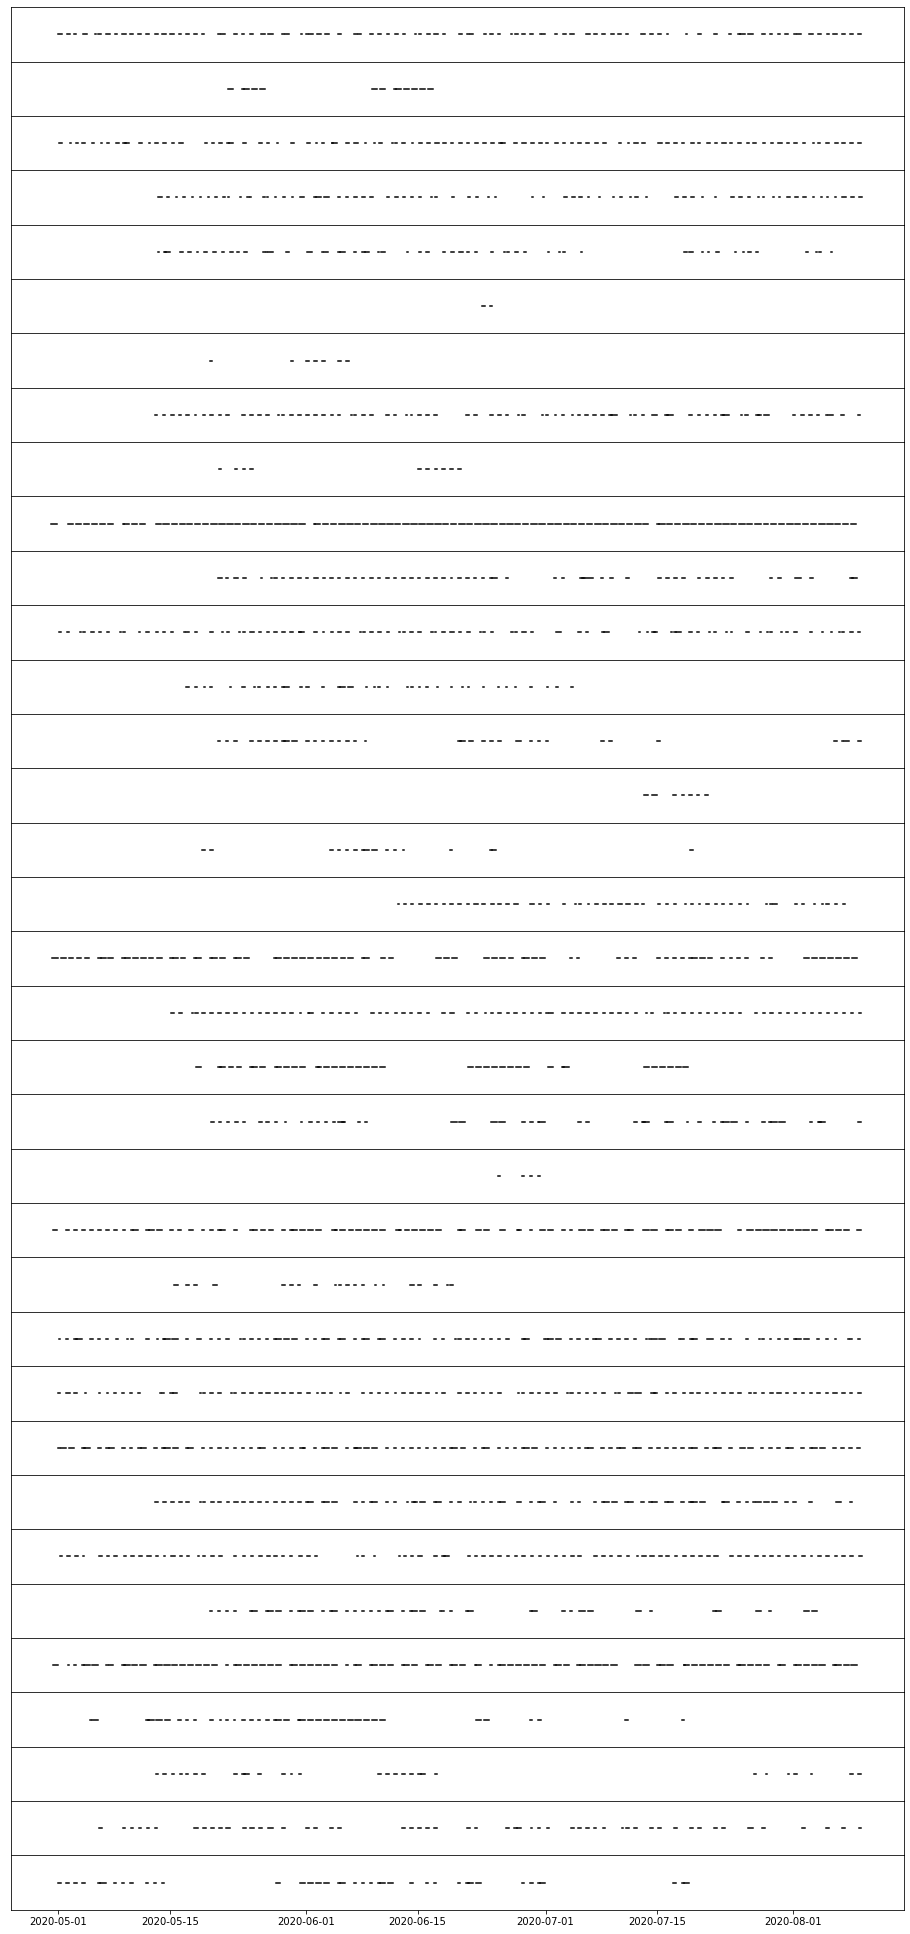

In [131]:
i = 0
fig, ax = plt.subplots(len(minute_sleep['beiwe'].unique()),1,figsize=(16,len(minute_sleep['beiwe'].unique())),sharex=True)
for beiwe in minute_sleep['beiwe'].unique():
    minute_fitbit_by_beiwe = minute_sleep[minute_sleep['beiwe'] == beiwe]
    starts = []
    ends = []
    for end_day in minute_fitbit_by_beiwe['end_date'].unique():
        by_day = minute_fitbit_by_beiwe[minute_fitbit_by_beiwe['end_date'] == end_day]
        start_date = datetime(by_day['start_date'].iloc[0].year,by_day['start_date'].iloc[0].month,by_day['start_date'].iloc[0].day,
                             by_day['time'].iloc[0].hour)
        starts.append(start_date)
        end_date = datetime(by_day['start_date'].iloc[-1].year,by_day['start_date'].iloc[-1].month,by_day['start_date'].iloc[-1].day,
                             by_day['time'].iloc[-1].hour) 
        ends.append(end_date)
        
    for first, last in zip(starts, ends):
        ax[i].plot([first,last],[1,1], color='black')
        
    ax[i].set_yticks([])
        
    i += 1
    
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()